Лабораторная Кузнецовой Екатерины

Данные: https://archive.ics.uci.edu/ml/datasets/BLOGGER 

Задача: необходимо классифицировать блогеров на профессиональных и сезонных. 


In [37]:
#подключаем библиотеки
import numpy as np # большие многомерные массивы и матрицы, мат. функции для операций с этими данными
import matplotlib.pyplot as plt # визуализация данных 2D-графикой (3D тоже поддерживается)
import pandas as pd # анализ и обработка данных (таблицы DataFrame)
%matplotlib inline 
#from sklearn import preprocessing # алгоритмы машинного обучения
#from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split

In [2]:
#считывание файла

data = pd.read_csv('kohkiloyeh.csv', engine = 'python',delimiter=',')

In [3]:
data.shape

(100, 6)

In [4]:
data.head()

,Degree,caprice,topic,lmt,lpss,pb
0,high,left,impression,yes,yes,yes
1,high,left,political,yes,yes,yes
2,medium,middle,tourism,yes,yes,yes
3,high,left,political,yes,yes,yes
4,medium,middle,news,yes,yes,yes


In [5]:
data.tail()

,Degree,caprice,topic,lmt,lpss,pb
95,medium,middle,impression,yes,yes,yes
96,low,middle,impression,yes,no,no
97,low,right,impression,yes,no,no
98,medium,right,news,yes,yes,no
99,medium,left,impression,yes,yes,yes


Attribute Information:

* Degree - education
* caprice - political caprice
* topic - topics
* lmt -  local media turnover (LMT)
* lpss - local, political and social space (LPSS)
* pb - professional bloggers


In [6]:
data.at[0, 'Degree']

'high'

In [7]:
data['Degree']

0       high
1       high
2     medium
3       high
4     medium
5     medium
6       high
7       high
8       high
9     medium
10      high
11    medium
12      high
13       low
14      high
15    medium
16    medium
17      high
18    medium
19      high
20      high
21    medium
22      high
23       low
24      high
25      high
26       low
27      high
28      high
29    medium
       ...  
70    medium
71    medium
72    medium
73       low
74      high
75      high
76       low
77      high
78      high
79    medium
80      high
81       low
82    medium
83       low
84      high
85    medium
86    medium
87    medium
88    medium
89    medium
90      high
91    medium
92      high
93    medium
94    medium
95    medium
96       low
97       low
98    medium
99    medium
Name: Degree, Length: 100, dtype: object

In [8]:
data.describe(include = [object]) 
data_describe = data.describe(include = [object])
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object'] 
numerical_columns = [c for c in data.columns if data[c].dtype.name != 'object'] 
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])

print(categorical_columns) 
print(numerical_columns) 



['Degree', 'caprice', 'topic', 'lmt', 'lpss', 'pb']
[]


In [9]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)


['lmt', 'lpss', 'pb'] ['Degree', 'caprice', 'topic']


In [10]:
#обработка бинарных признаков

data.at[data['lmt'] == 'yes', 'lmt'] = 1
data.at[data['lmt'] == 'no', 'lmt'] = 0
data.at[data['lpss'] == 'yes', 'lpss'] = 1
data.at[data['lpss'] == 'no', 'lpss'] = 0
data.at[data['pb'] == 'yes', 'pb'] = 1
data.at[data['pb'] == 'no', 'pb'] = 0

#обработка небинарных признаков, векторизация

data['Degree'].unique()

data['caprice'].unique()

data['topic'].unique()

array(['impression', 'political', 'tourism', 'news', 'scientific'],
      dtype=object)

In [11]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['Degree_high', 'Degree_low', 'Degree_medium', 'caprice_left',
       'caprice_middle', 'caprice_right', 'topic_impression', 'topic_news',
       'topic_political', 'topic_scientific', 'topic_tourism'],
      dtype='object')


In [12]:
data_nonbinary.head()

,Degree_high,Degree_low,Degree_medium,caprice_left,caprice_middle,caprice_right,topic_impression,topic_news,topic_political,topic_scientific,topic_tourism
0,1,0,0,1,0,0,1,0,0,0,0
1,1,0,0,1,0,0,0,0,1,0,0
2,0,0,1,0,1,0,0,0,0,0,1
3,1,0,0,1,0,0,0,0,1,0,0
4,0,0,1,0,1,0,0,1,0,0,0


In [13]:
#соединяем всё в одну таблицу
data_numerical = data[numerical_columns]
data = pd.concat((data_numerical, data_nonbinary, data[binary_columns]), axis = 1)
print(data.shape)



(100, 14)


In [14]:
data.head()


,Degree_high,Degree_low,Degree_medium,caprice_left,caprice_middle,caprice_right,topic_impression,topic_news,topic_political,topic_scientific,topic_tourism,lmt,lpss,pb
0,1,0,0,1,0,0,1,0,0,0,0,1,1,1
1,1,0,0,1,0,0,0,0,1,0,0,1,1,1
2,0,0,1,0,1,0,0,0,0,0,1,1,1,1
3,1,0,0,1,0,0,0,0,1,0,0,1,1,1
4,0,0,1,0,1,0,0,1,0,0,0,1,1,1


In [15]:
#матрицу корреляций ищем 
corr = data.corr()
corr 

,Degree_high,Degree_low,Degree_medium,caprice_left,caprice_middle,caprice_right,topic_impression,topic_news,topic_political,topic_scientific,topic_tourism
Degree_high,1.000000,-0.322613,-0.752971,0.193697,-0.322613,0.032028,-0.113293,-0.282736,0.616828,-0.219369,-0.221059
Degree_low,-0.322613,1.000000,-0.379949,-0.189207,0.003322,0.197115,0.178147,-0.048485,-0.175224,0.115212,-0.008071
Degree_medium,-0.752971,-0.379949,1.000000,-0.057750,0.312967,-0.168339,-0.013136,0.310015,-0.480981,0.134282,0.221644
caprice_left,0.193697,-0.189207,-0.057750,1.000000,-0.419948,-0.747048,0.024371,-0.095922,0.117502,0.028242,-0.100901
caprice_middle,-0.322613,0.003322,0.312967,-0.419948,1.000000,-0.289589,0.178147,0.171903,-0.296068,0.002259,-0.008071
caprice_right,0.032028,0.197115,-0.168339,-0.747048,-0.289589,1.000000,-0.156194,-0.024753,0.092943,-0.031440,0.112328
topic_impression,-0.113293,0.178147,-0.013136,0.024371,0.178147,-0.156194,1.000000,-0.272166,-0.412360,-0.154172,-0.236067
topic_news,-0.282736,-0.048485,0.310015,-0.095922,0.171903,-0.024753,-0.272166,1.000000,-0.355395,-0.132875,-0.203456
topic_political,0.616828,-0.175224,-0.480981,0.117502,-0.296068,0.092943,-0.412360,-0.355395,1.000000,-0.201319,-0.308257
topic_scientific,-0.219369,0.115212,0.134282,0.028242,0.002259,-0.031440,-0.154172,-0.132875,-0.201319,1.000000,-0.115251


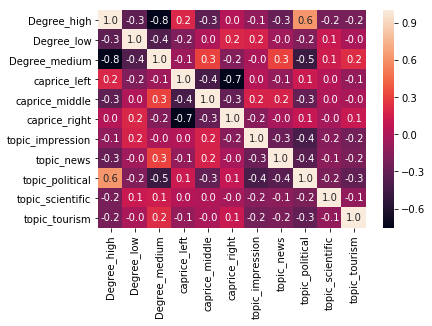

In [16]:
import seaborn as sns
sns.heatmap(corr, annot=True, fmt=".1f");

Видим из матрицы, что максимальная корреляция у признаков topic_political и Degree_high (т.е. для ведения
политических блогов важно наличие высшего образования), минимальная же со всеми признаками корреляция у 
признака topic_scientific(т.е. научные темы особо не связаны с другими признаками). Однако в данном случае при удалении
признаков результат улучшен не будет, поэтому все признаки остаются. 

In [17]:
# подготовка данных к работе алгоритма KNN, нормализация в данной задаче не требуется. 
# Нужно отделить столбец, отвечающий за классы(а именно pb), и остальные данные поделить на обучающую и тестовую выборку. 
Y = data['pb'] 
X = data.drop(('pb'), axis = 1) 
print(X.shape) 
print(Y.shape) 

(100, 13)
(100,)


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

75 25


In [41]:
#алгоритм K-ближайших соседей. Возьмем количество соседей = 5
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)


In [43]:
knn.fit(X_train, Y_train)

ValueError: Unknown label type: 'unknown'